# Click "Edit App" to see the code
# Average of multiple datasets

In this short tutorial we hoe to compute the average and standard deviation of multiple datasets, which are assumed to be stored in different files.

# The Jupyter Notebook
As always we start by loadin the Python libraries

In [1]:
# python packages
import pandas as pd # DataFrames and reading CSV files
import numpy as np # Numerical libraries
import matplotlib.pyplot as plt # Plotting library
from lmfit import Model # Least squares fitting library

In order to compute the average of multiple dataset stored in different files, we create an array that contains all file names and then write a simple loop over its elements and compute the average using the NumPy function we learned in the previous examples

In [2]:
listOfFiles = ["random1.csv",
               "random2.csv",
               "random3.csv",
               "random4.csv"]

for file in listOfFiles:
    data = pd.read_csv(file)
    average = np.mean(data["Y"])
    print("The average from file ",file," is ",average)

The average from file  random1.csv  is  12.96291810195261
The average from file  random2.csv  is  20.06100961117126
The average from file  random3.csv  is  20.012630267896345
The average from file  random4.csv  is  12.97037031648189


A more useful approach, is to create an a DataFrame to store all the averages, which will be useful for further processing. Let's for example imagine that each file corresponds to a observations collected at a different temperatures (278, 300, 302, 282).

In [3]:
listOfTemperatures = [278, 300, 302, 282]

We then create a DataFrame with three columns, the file name, the temperature and the average of the values in the file.

In [4]:
results_df = pd.DataFrame(columns =["File","Temperature","Average"])
print(results_df)

Empty DataFrame
Columns: [File, Temperature, Average]
Index: []


As seen in the first tutorial, we use the **loc** indexer to append data to the DataFrame.
**_len(results_df)_** counts counts the number of elements that we have already added to the DataFrame.

In [5]:
for file in listOfFiles:
    data = pd.read_csv(file)
    average = np.mean(data["Y"])
    
    ndata = len(results_df)
    results_df.loc[ndata] = [file, listOfTemperatures[ndata], average]
print(results_df)

          File Temperature    Average
0  random1.csv         278  12.962918
1  random2.csv         300  20.061010
2  random3.csv         302  20.012630
3  random4.csv         282  12.970370


We can now plot the average versus temperature.
However, because the temperatures are not in increasing order we sort the DataFrame to make the graph look nicer.

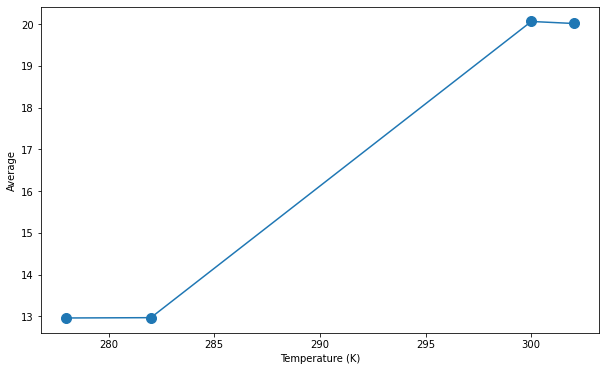

In [6]:
results_df = results_df.sort_values('Temperature')

fig , ax = plt.subplots(figsize=(10,6))
ax.scatter(results_df["Temperature"],results_df["Average"],s=100)
ax.plot(results_df["Temperature"],results_df["Average"])
ax.set(xlabel="Temperature (K)")
ax.set(ylabel="Average")
plt.show()